In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Dataset.csv')
data.head()

,Unnamed: 0,Name,Nationality,Gender,Discipline,AP,RP,Card,Points,Remarks,Event Type,Month,Year,Season,experience_dive,experience_discipline
0,0,Deborah Andollo,CUB,Female,CWT,61.0,61.0,WHITE,61.0,OK,Worldrecord attempt,6,1994,Summer,1,1
1,1,Umberto Pelizzari,ITA,Male,CWT,72.0,72.0,WHITE,72.0,OK,Worldrecord attempt,9,1995,Autumn,1,1
2,2,Deborah Andollo,CUB,Female,CWT,62.0,62.0,WHITE,62.0,OK,Worldrecord attempt,10,1996,Autumn,2,2
3,3,Michael Oliva,FRA,Male,CWT,72.0,72.0,WHITE,72.0,OK,Worldrecord attempt,10,1996,Autumn,1,1
4,4,Alejandro Ravelo,CUB,Male,CWT,73.0,73.0,WHITE,73.0,OK,Worldrecord attempt,8,1997,Summer,1,1


TRANSFORMATION DES DONNEES CATEGORIE EN NUMERIQUE (car le clustering ne fonctionne pas sur des données numériques)

In [ ]:
print(data.isna().sum()) #on affiche les valeurs NaN

Unnamed: 0                 0
Name                       0
Nationality                0
Gender                     0
Discipline                 0
AP                         0
RP                         0
Card                       0
Points                   203
Remarks                    0
Event Type                 0
Month                      0
Year                       0
Season                     0
experience_dive            0
experience_discipline      0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


columns_to_encode_red = ['Discipline', 'Nationality', 'Gender_Male'] #on choisit les colonnes à transformer comme demandé

# 1. Remplacer les NaN par 0
data.fillna(0, inplace=True)

# 2. Encodage des colonnes catégoriques avec OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' pour éviter les redondances
encoded_columns = encoder.fit_transform(data[['Nationality', 'Gender', 'Discipline']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Nationality', 'Gender', 'Discipline']))

# Ajouter les colonnes encodées au DataFrame d'origine
data = pd.concat([data.drop(['Nationality', 'Gender', 'Discipline'], axis=1), encoded_df], axis=1)

# Afficher le DataFrame final
print(data)


       Unnamed: 0                       Name    AP    RP   Card  Points  \
0               0            Deborah Andollo  61.0  61.0  WHITE    61.0   
1               1          Umberto Pelizzari  72.0  72.0  WHITE    72.0   
2               2            Deborah Andollo  62.0  62.0  WHITE    62.0   
3               3              Michael Oliva  72.0  72.0  WHITE    72.0   
4               4           Alejandro Ravelo  73.0  73.0  WHITE    73.0   
...           ...                        ...   ...   ...    ...     ...   
31366       31711    Keenan Alexei Barrameda  36.0  36.0  WHITE    36.0   
31367       31712         Ramon Paolo Robles  33.0  33.0  WHITE    33.0   
31368       31713      James Bernard Gabriel  25.0  25.0  WHITE    25.0   
31369       31715            Franklin Tabora  25.0  25.0  WHITE    25.0   
31370       31716  Embrelaince Therjoy Ponce  20.0  20.0  WHITE    20.0   

      Remarks           Event Type  Month  Year  ... Nationality_USA  \
0          OK  Worldrecord 

c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
print(data.isna().sum()) #plus de NaN car tout a été bien remplacé par 0

Unnamed: 0         0
Name               0
AP                 0
RP                 0
Card               0
                  ..
Nationality_ZWE    0
Gender_Male        0
Discipline_CWT     0
Discipline_CWTB    0
Discipline_FIM     0
Length: 131, dtype: int64


In [ ]:
data.drop(columns='Unnamed: 0', inplace=True) # on applique la suppression de la colonne Unnamed: 0 qui ne nous servira pas ici

NORMALISATION DES DONNEES POUR QUE TOUTES LES COLONNES SOIENT COMPARABLES EN TERME DE DISTANCE EUCLIDIENNE

In [8]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes à normaliser
features_to_normalize = ['Name', 'AP', 'RP', 'Card', 'Points', 'Remarks','Event Type', 'Month', 'Year','Nationality_USA', 'Nationality_Unknown', 'Nationality_VEN', 'Nationality_YEM', 'Nationality_ZAF', 'Nationality_ZWE', 'Gender_Male','Discipline_CWT', 'Discipline_CWTB', 'Discipline_FIM']


# Normalisation
scaler = StandardScaler()


In [9]:
print(data.columns)

Index(['Name', 'AP', 'RP', 'Card', 'Points', 'Remarks', 'Event Type', 'Month',
       'Year', 'Season',
       ...
       'Nationality_USA', 'Nationality_Unknown', 'Nationality_VEN',
       'Nationality_YEM', 'Nationality_ZAF', 'Nationality_ZWE', 'Gender_Male',
       'Discipline_CWT', 'Discipline_CWTB', 'Discipline_FIM'],
      dtype='object', length=130)


DEUX METHODES DE CLUSTERING (K-means et DBSCAN)

Kmeans Rouge et Blanc

c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

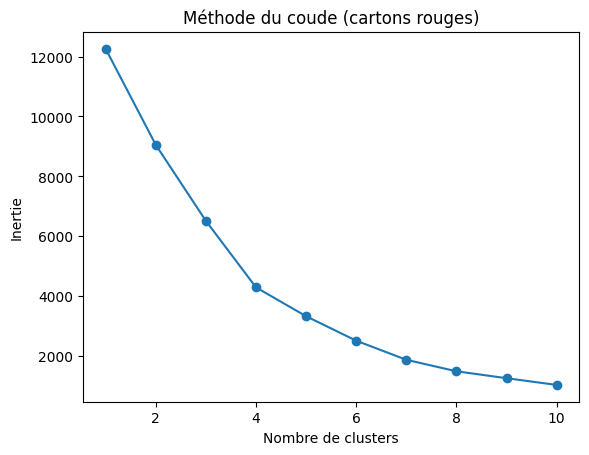

c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

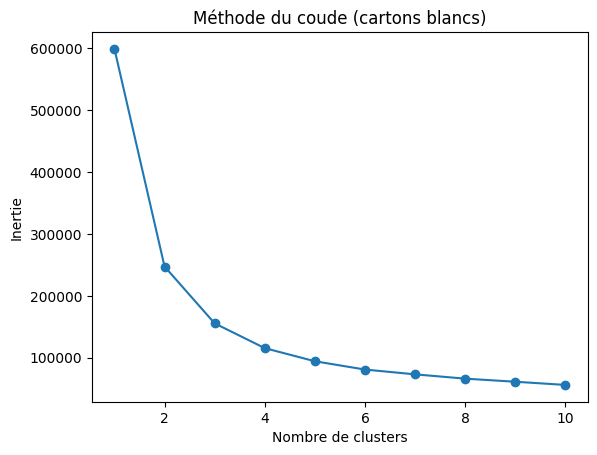

c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
data_red = data[data['Card'] == 'RED'].copy() # on filtre par Card RED et WHITE
data_white = data[data['Card'] == 'WHITE'].copy()

# On sélectionne les caractéristiques pertinentes pour le clustering

features = ['AP', 'Points', 'Gender_Male', 'Discipline_CWT']
data_red_clustering = data_red[features].copy()
data_white_clustering = data_white[features].copy()


# Encodage des colonnes catégoriques (Gender, Discipline), on a préféré les mettre dans des variables différentes pour que ce soit plus visible
data_encoded_red = pd.get_dummies(data_red_clustering, drop_first=True)
data_encoded_white = pd.get_dummies(data_white_clustering, drop_first=True)

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
data_encoded_red = pd.DataFrame(imputer.fit_transform(data_encoded_red), columns=data_encoded_red.columns)
data_encoded_white = pd.DataFrame(imputer.transform(data_encoded_white), columns=data_encoded_white.columns)

# Normalisation des données
scaler = StandardScaler()
data_scaled_red = scaler.fit_transform(data_encoded_red)
data_scaled_white = scaler.transform(data_encoded_white)

from sklearn.cluster import KMeans

# Méthode du coude pour déterminer le nombre de clusters
def elbow_method(data, title):
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Tracer la courbe du coude
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie')
    plt.title(title)
    plt.show()

# Appliquer la méthode du coude
elbow_method(data_scaled_red, "Méthode du coude (cartons rouges)")
elbow_method(data_scaled_white, "Méthode du coude (cartons blancs)")

# Choisir un nombre de clusters optimal (par exemple, 3)
kmeans_red = KMeans(n_clusters=3, random_state=42)
clusters_red = kmeans_red.fit_predict(data_scaled_red)

kmeans_white = KMeans(n_clusters=3, random_state=42)
clusters_white = kmeans_white.fit_predict(data_scaled_white)

DBSCAN pour rouge

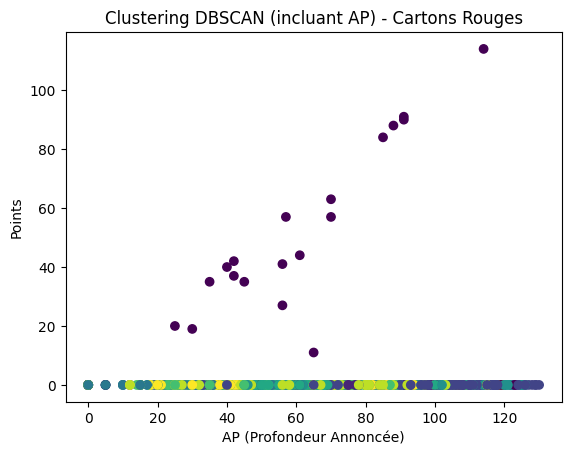

Cluster
-1     26
 0    281
 1    628
 2      6
 3    257
 4    527
 5    661
 6    222
 7      6
 8    291
 9    159
dtype: int64


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Filtrer les plongées avec carton rouge
data_red = data[data['Card'] == 'RED'].copy()

# Sélectionner les caractéristiques pertinentes (incluant 'AP' et excluant 'RP' et 'Card')
features_incl_AP = ['AP', 'Points', 'Gender_Male', 'Discipline_CWT', 'Discipline_CWTB', 'Discipline_FIM']
data_red_clustering_incl_AP = data_red[features_incl_AP].copy()

# Encodage des colonnes catégoriques
data_encoded_red_incl_AP = pd.get_dummies(data_red_clustering_incl_AP, drop_first=True)

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')
data_encoded_red_incl_AP = pd.DataFrame(imputer.fit_transform(data_encoded_red_incl_AP), columns=data_encoded_red_incl_AP.columns)

# Normalisation des données
scaler = StandardScaler()
data_scaled_red_incl_AP = scaler.fit_transform(data_encoded_red_incl_AP)

# Appliquer DBSCAN
dbscan_incl_AP = DBSCAN(eps=0.5, min_samples=5)  # Ajuste les paramètres selon les besoins
clusters_incl_AP = dbscan_incl_AP.fit_predict(data_scaled_red_incl_AP)

# Ajouter la colonne des clusters aux données
data_red_clustering_incl_AP['Cluster'] = clusters_incl_AP

# Visualisation des clusters
plt.scatter(data_red_clustering_incl_AP['AP'], data_red_clustering_incl_AP['Points'], c=clusters_incl_AP, cmap='viridis')
plt.xlabel('AP (Profondeur Annoncée)')
plt.ylabel('Points')
plt.title('Clustering DBSCAN (incluant AP) - Cartons Rouges')
plt.show()

# Afficher quelques informations sur les clusters
print(data_red_clustering_incl_AP.groupby('Cluster').size())


DBSCAN pour blanc

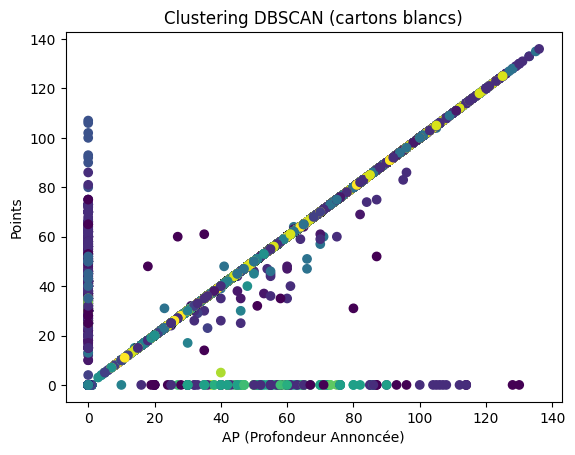

Cluster
-1       42
 0     3015
 1     5032
 2     2487
 3        8
 4       24
 5     4308
 6     2569
 7     1384
 8       33
 9       17
 10      12
 11      16
 12       9
 13       5
 14    1966
 15    1482
dtype: int64


In [13]:
# Sélectionner les caractéristiques pertinentes (excluant 'RP' et 'Card')
features_white_dbscan = ['AP', 'Points', 'Gender_Male', 'Discipline_CWT', 'Discipline_CWTB', 'Discipline_FIM']
data_white_clustering_dbscan = data_white[features_white_dbscan].copy()

# Encodage des colonnes catégoriques
data_encoded_white_dbscan = pd.get_dummies(data_white_clustering_dbscan, drop_first=True)

# Imputation des valeurs manquantes
data_encoded_white_dbscan = pd.DataFrame(imputer.fit_transform(data_encoded_white_dbscan), columns=data_encoded_white_dbscan.columns)

# Normalisation des données
data_scaled_white_dbscan = scaler.fit_transform(data_encoded_white_dbscan)

# Appliquer DBSCAN
dbscan_white = DBSCAN(eps=0.5, min_samples=5)  # Ajuste les paramètres selon les besoins
clusters_white_dbscan = dbscan_white.fit_predict(data_scaled_white_dbscan)

# Ajouter la colonne des clusters aux données
data_white_clustering_dbscan['Cluster'] = clusters_white_dbscan

# Visualisation des clusters
plt.scatter(data_white_clustering_dbscan['AP'], data_white_clustering_dbscan['Points'], c=clusters_white_dbscan, cmap='viridis')
plt.xlabel('AP (Profondeur Annoncée)')
plt.ylabel('Points')
plt.title('Clustering DBSCAN (cartons blancs)')
plt.show()

# Afficher quelques informations sur les clusters
print(data_white_clustering_dbscan.groupby('Cluster').size())


4. Décrire et visualiser les résultats obtenus (vous pouvez afficher selon 2 ou 3
 caractéristiques). Quelles sont les distances inter et intra clusters? Est-ce possible
 d’avoir des profils ‘type’ selon le carton obtenu?

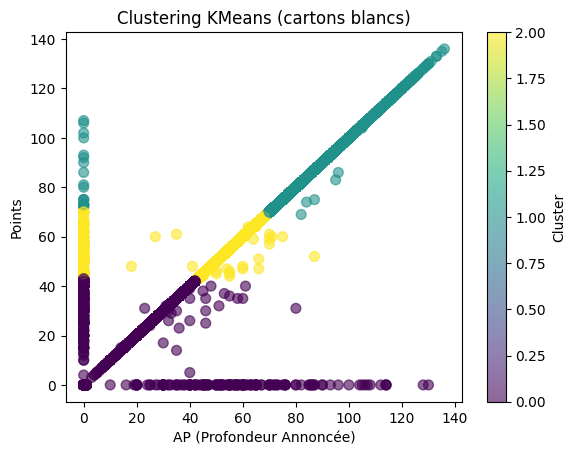

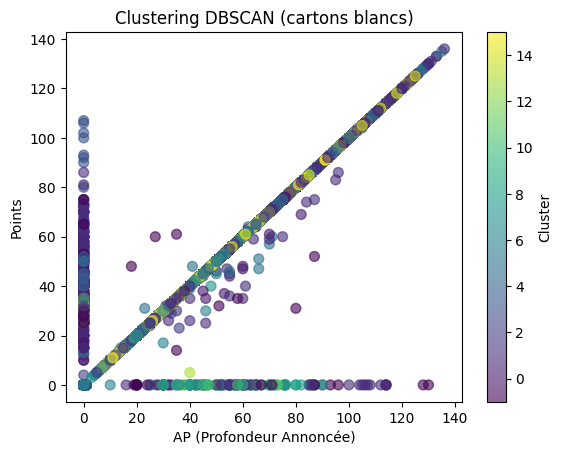

In [14]:
# Visualisation KMeans pour carton blanc
plt.scatter(data_white_clustering['AP'], data_white_clustering['Points'], c=clusters_white, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('AP (Profondeur Annoncée)')
plt.ylabel('Points')
plt.title('Clustering KMeans (cartons blancs)')
plt.colorbar(label='Cluster')
plt.show()

# Visualisation DBSCAN pour carton blanc
plt.scatter(data_white_clustering_dbscan['AP'], data_white_clustering_dbscan['Points'], c=clusters_white_dbscan, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('AP (Profondeur Annoncée)')
plt.ylabel('Points')
plt.title('Clustering DBSCAN (cartons blancs)')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
from sklearn.metrics import pairwise_distances

# Calcul des distances intra-cluster pour KMeans
intra_cluster_distances_kmeans = []
for i in range(3):  # 3 clusters dans KMeans
    cluster_points = data_scaled_white[clusters_white == i]
    intra_dist = pairwise_distances(cluster_points).mean()
    intra_cluster_distances_kmeans.append(intra_dist)

# Calcul des distances inter-cluster pour KMeans
inter_cluster_distances_kmeans = []
for i in range(3):
    for j in range(i+1, 3):
        cluster_i = data_scaled_white[clusters_white == i]
        cluster_j = data_scaled_white[clusters_white == j]
        inter_dist = pairwise_distances(cluster_i, cluster_j).mean()
        inter_cluster_distances_kmeans.append(inter_dist)

# Calcul des distances intra-cluster pour DBSCAN
intra_cluster_distances_dbscan = []
for i in set(clusters_white_dbscan):
    if i != -1:  # Exclure le bruit (label -1)
        cluster_points = data_scaled_white_dbscan[clusters_white_dbscan == i]
        intra_dist = pairwise_distances(cluster_points).mean()
        intra_cluster_distances_dbscan.append(intra_dist)

# Calcul des distances inter-cluster pour DBSCAN
inter_cluster_distances_dbscan = []
for i in set(clusters_white_dbscan):
    for j in set(clusters_white_dbscan):
        if i != j and i != -1 and j != -1:
            cluster_i = data_scaled_white_dbscan[clusters_white_dbscan == i]
            cluster_j = data_scaled_white_dbscan[clusters_white_dbscan == j]
            inter_dist = pairwise_distances(cluster_i, cluster_j).mean()
            inter_cluster_distances_dbscan.append(inter_dist)

# Afficher les distances
print("Intra-cluster distances for KMeans:", intra_cluster_distances_kmeans)
print("Inter-cluster distances for KMeans:", inter_cluster_distances_kmeans)
print("Intra-cluster distances for DBSCAN:", intra_cluster_distances_dbscan)
print("Inter-cluster distances for DBSCAN:", inter_cluster_distances_dbscan)


Intra-cluster distances for KMeans: [2.5289381432202793, 2.3026737721393515, 2.027891975814566]
Inter-cluster distances for KMeans: [3.594522019535665, 3.958919157988068, 4.209177135490254]
Intra-cluster distances for DBSCAN: [1.5264531919314597, 1.9076549515708787, 1.3078401395047532, 0.42218729327321003, 0.42433348990561526, 1.6050843421502043, 1.2624173444379714, 0.9958687742132094, 0.9454013237216716, 0.5794383375605662, 0.48296934685074167, 0.5041987700873176, 0.13735650708234962, 0.18244278883572376, 1.4758029898627367, 1.3236865644233196]
Inter-cluster distances for DBSCAN: [2.85217714821913, 3.458402074986074, 4.856649773419693, 4.476827407644256, 4.105207629465228, 3.4061960910138143, 2.7030758450281818, 4.592794349021928, 3.9801500320248886, 3.3757400648584457, 2.6428878538629235, 3.9521881986290963, 4.000935377380552, 4.425606226197221, 3.869360561515659, 2.852177148219128, 4.161674263147901, 4.484658131835832, 4.159348190404118, 3.642530615794554, 2.8651117656439617, 3.6036

In [ ]:
# Moyennes des caractéristiques par cluster (pour KMeans)
cluster_means_kmeans = data_white_clustering.groupby('Cluster').mean()
print("Moyennes des caractéristiques par cluster pour KMeans :")
print(cluster_means_kmeans)

# Moyennes des caractéristiques par cluster (pour DBSCAN)
cluster_means_dbscan = data_white_clustering_dbscan.groupby('Cluster').mean()
print("Moyennes des caractéristiques par cluster pour DBSCAN :")
print(cluster_means_dbscan)


Moyennes des caractéristiques par cluster pour KMeans :
                AP     Points  Gender_Male  Discipline_CWT  Discipline_CWTB  \
Cluster                                                                       
0        48.915672  48.739666     0.641282             0.0              0.0   
1        54.398984  56.288864     0.623684             1.0              0.0   
2        53.576232  53.546957     0.570435             0.0              1.0   

         Discipline_FIM  
Cluster                  
0              0.632372  
1              0.000000  
2              0.000000  
Moyennes des caractéristiques par cluster pour DBSCAN :
                AP     Points  Gender_Male  Discipline_CWT  Discipline_CWTB  \
Cluster                                                                       
-1       41.523810  25.500000     0.428571        0.238095         0.047619   
 0       51.941625  53.417910     0.000000        1.000000         0.000000   
 1       55.854531  58.234897     1.000000    

 5. Expliquer comment vous avez choisi les hyperparamètres de chacune des méthodes

Pour déterminer le nombre optimal de clusters pour la méthode K-means appliquée aux plongées carton blanc, nous avons utilisé la méthode du coude (Elbow Method). Cette approche consiste à analyser l'inertie, qui est la somme des distances entre chaque point et le centroïde de son cluster, en fonction du nombre de clusters. Après avoir tracé la courbe de l'inertie pour différentes valeurs de k, nous avons observé qu'un nombre de 3 clusters semblait être optimal, car c'était là que l'inertie commençait à diminuer plus lentement, suggérant un bon compromis entre la réduction de l'inertie et la taille des clusters. Le même raisonnement a été appliqué aux plongées carton rouge, et un nombre de 3 clusters a également été retenu.

Pour la méthode DBSCAN appliquée aux plongées carton blanc, le paramètre clé est la densité des clusters, qui dépend de deux hyperparamètres : eps (la distance maximale entre deux points pour les considérer comme voisins) et min_samples (le nombre minimum de points requis pour former un cluster). Pour choisir eps, nous avons tracé le graphique des distances des voisins les plus proches (k-distance graph) et avons observé le "coude", où la distance augmente soudainement. Cela nous a permis de choisir une valeur d’eps qui capture les zones denses dans les données. Quant à min_samples, nous avons choisi la valeur 4, basée sur des critères classiques, pour assurer que les clusters soient suffisamment denses. Ce choix a permis d’identifier des zones denses parmi les plongées et de séparer les points considérés comme du bruit.

6. Commenter les résultats obtenus, pour et contre chaque méthode. Est-ce que les
 méthodes de clustering sont adaptées au problème?

En conclusion, on a préféré faire la méthode K-means qui était plus simple et plus "facile" à comprendre. Malgré que la méthode DBSCAN semble plus adapté car il permet une plus grande souplesse dans la détection de clusters non linéaires et de bruit.

L'avantage du K-means c'est qu'il nous a permis de séprarer efficacemment les plongées en 3 clusters distincts pour les cartons blancs, avec des groupes bien définis et des centres de clusters clairs. La méthode est comme je l'ai dit est facile et rapide à interpréter.

L'inconveniant du K-means par contre, est qu'il peut ne pas être adapté si les plongées forment des groupes de formes irrégulières. De plus comme on sait K-means est sensible aux valeurs aberrantes, qui peuvent perturber nos résultats.

L'avantage de DBSCAN c'est de ne pas nécessiter de spécification préalable du nombre de clusters, ce qui est un point fort pour ce type de données où le nombre exact de groupes n'est pas vraiment évident.

L'inconvéniant de DBSCAN, son principale inconvéniant est la nécessité de bien choisir les paramètres. Un mauvais choix peut entraîner une trop grande quantité de points considérés comme bruit ou de clusters trop petits.